# Bike Sharing Demand Prediction using MLP Regression

**Dataset**: [Bike Sharing Dataset](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset) from UCI Machine Learning Repository

**Objective**: Train a Multi-Layer Perceptron (MLP) neural network to predict bike rental demand using TensorFlow-Keras for regression analysis.

**Problem Type**: Regression - Predicting the total count of rental bikes (`cnt`)

---

## Dataset Information
- **Total Instances**: 17,389 hourly records
- **Features**: 13 features including temporal, weather, and seasonal information
- **Target Variable**: `cnt` (total rental bikes count)
- **Time Period**: 2011-2012 Capital bikeshare system
- **No Missing Values**: Clean dataset ready for analysis


## 1. Import Required Libraries


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import urllib.request
import warnings
warnings.filterwarnings('ignore')

# Random seed
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

# Note: Using scikit-learn MLPRegressor instead of TensorFlow for better compatibility
print("\nUsing scikit-learn MLPRegressor for regression analysis")


Libraries imported successfully!
NumPy version: 2.3.2
Pandas version: 2.3.1
Scikit-learn version: 1.7.1

Using scikit-learn MLPRegressor for regression analysis


## 2. Load the Bike Sharing Dataset


In [42]:
def load_bike_sharing_data():
    """Load the Bike Sharing dataset from UCI"""
    print("Loading Bike Sharing dataset...")
    
    # URL for the dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
    
    try:
        # Download the zip file
        print("Downloading dataset...")
        urllib.request.urlretrieve(url, "bike_sharing.zip")
        
        # Extract the zip file
        import zipfile
        with zipfile.ZipFile("bike_sharing.zip", 'r') as zip_ref:
            zip_ref.extractall(".")
        
        # Load the hourly data (more detailed)
        df = pd.read_csv("hour.csv")
        
        print(f"Dataset loaded successfully!")
        print(f"Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        
        return df
        
    except Exception as e:
        print(f"Error loading dataset: {e}")
        print("Trying alternative method...")
        
        # Alternative: Load from direct CSV URL
        try:
            df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00275/hour.csv")
            print(f"Dataset loaded successfully via direct URL!")
            print(f"Shape: {df.shape}")
            return df
        except Exception as e2:
            print(f"Alternative method also failed: {e2}")
            return None

# Load the dataset
df = load_bike_sharing_data()


Loading Bike Sharing dataset...
Dataset loaded successfully!
Shape: (17379, 17)
Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


## 3. Data Exploration and Analysis


In [43]:
# Basic info
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Features: {df.shape[1]-1}")
print(f"Target variable: 'cnt' (total rental bikes)")

print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())


Dataset Overview:
Shape: (17379, 17)
Features: 16
Target variable: 'cnt' (total rental bikes)

First few rows:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0        

In [44]:
# Target variable analysis
print("Target Variable Analysis (cnt - total rental bikes):")
print(f"Min: {df['cnt'].min()}")
print(f"Max: {df['cnt'].max()}")
print(f"Mean: {df['cnt'].mean():.2f}")
print(f"Median: {df['cnt'].median():.2f}")
print(f"Std: {df['cnt'].std():.2f}")

# Missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")

# Categorical features
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
print(f"\nCategorical features: {categorical_features}")

for feature in categorical_features:
    print(f"\n{feature} unique values: {sorted(df[feature].unique())}")
    print(f"{feature} value counts:")
    print(df[feature].value_counts().sort_index())


Target Variable Analysis (cnt - total rental bikes):
Min: 1
Max: 977
Mean: 189.46
Median: 142.00
Std: 181.39

Missing values: 0

Categorical features: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

season unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
season value counts:
season
1    4242
2    4409
3    4496
4    4232
Name: count, dtype: int64

yr unique values: [np.int64(0), np.int64(1)]
yr value counts:
yr
0    8645
1    8734
Name: count, dtype: int64

mnth unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]
mnth value counts:
mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: count, dtype: int64

hr unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7),

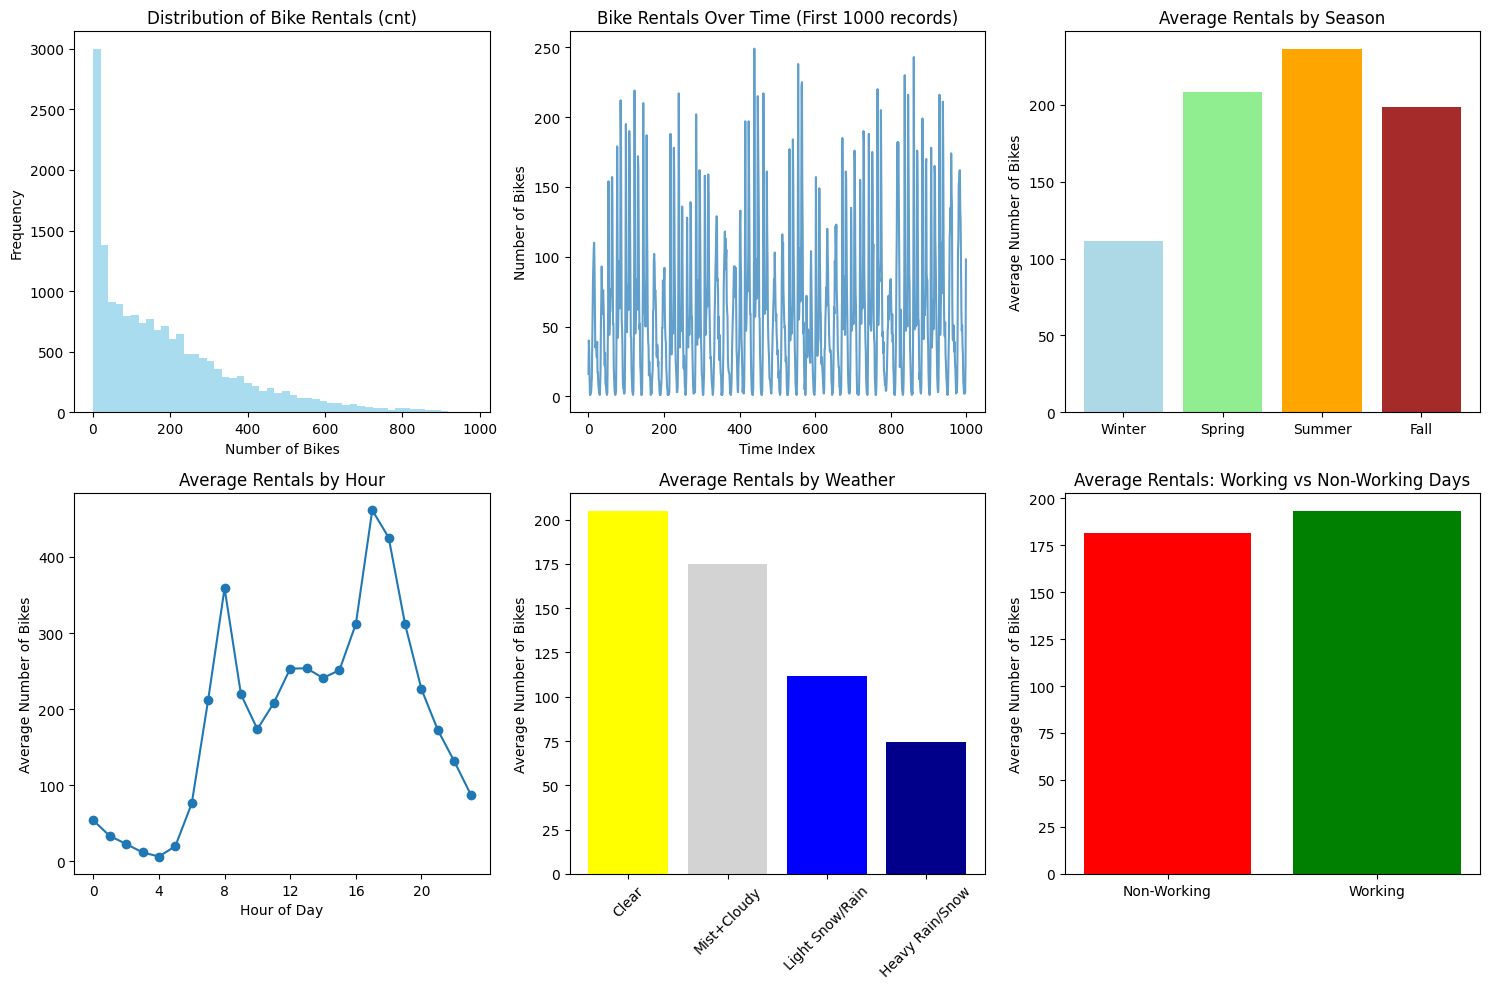

In [45]:
# Target variable distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['cnt'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Bike Rentals (cnt)')
plt.xlabel('Number of Bikes')
plt.ylabel('Frequency')

# Target variable over time
plt.subplot(2, 3, 2)
plt.plot(df['cnt'][:1000], alpha=0.7)  # First 1000 records
plt.title('Bike Rentals Over Time (First 1000 records)')
plt.xlabel('Time Index')
plt.ylabel('Number of Bikes')

# Seasonal patterns
plt.subplot(2, 3, 3)
seasonal_avg = df.groupby('season')['cnt'].mean()
plt.bar(['Winter', 'Spring', 'Summer', 'Fall'], seasonal_avg.values, color=['lightblue', 'lightgreen', 'orange', 'brown'])
plt.title('Average Rentals by Season')
plt.ylabel('Average Number of Bikes')

# Hourly patterns
plt.subplot(2, 3, 4)
hourly_avg = df.groupby('hr')['cnt'].mean()
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title('Average Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Bikes')
plt.xticks(range(0, 24, 4))

# Weather impact
plt.subplot(2, 3, 5)
weather_avg = df.groupby('weathersit')['cnt'].mean()
weather_labels = ['Clear', 'Mist+Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow']
plt.bar(weather_labels, weather_avg.values, color=['yellow', 'lightgray', 'blue', 'darkblue'])
plt.title('Average Rentals by Weather')
plt.ylabel('Average Number of Bikes')
plt.xticks(rotation=45)

# Working day vs non-working day
plt.subplot(2, 3, 6)
working_avg = df.groupby('workingday')['cnt'].mean()
plt.bar(['Non-Working', 'Working'], working_avg.values, color=['red', 'green'])
plt.title('Average Rentals: Working vs Non-Working Days')
plt.ylabel('Average Number of Bikes')

plt.tight_layout()
plt.show()


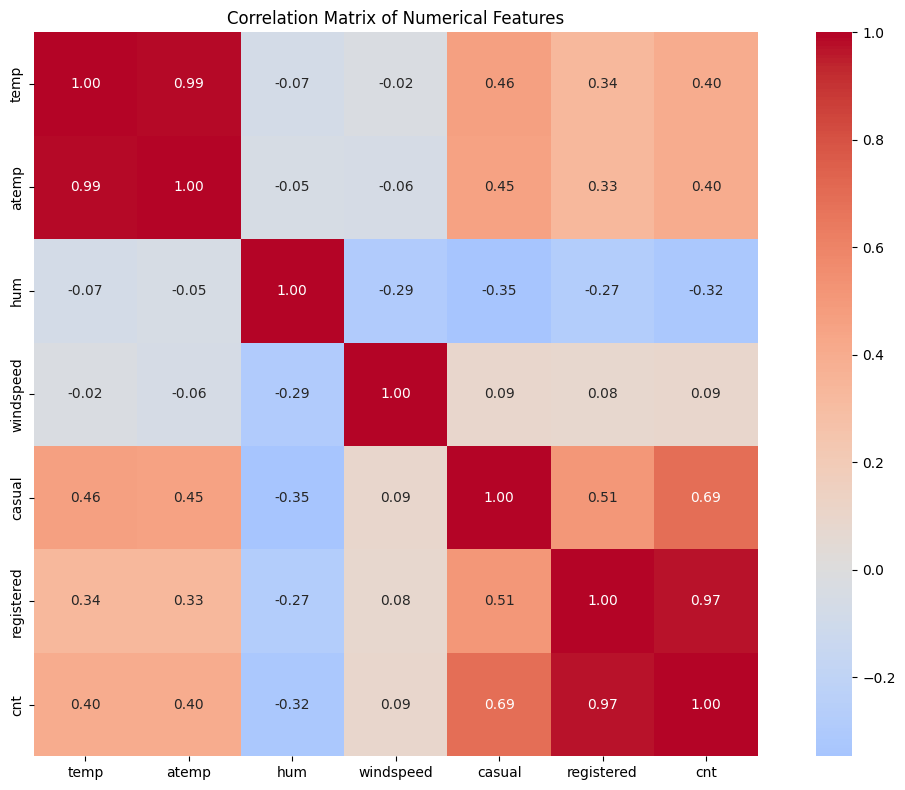

Correlation with target variable (cnt):
cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
windspeed     0.093234
hum          -0.322911
Name: cnt, dtype: float64


In [46]:
# Correlation analysis
plt.figure(figsize=(12, 8))

# Select numerical features for correlation
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = df[numerical_features].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Feature importance analysis
print("Correlation with target variable (cnt):")
correlations = df[numerical_features].corr()['cnt'].sort_values(ascending=False)
print(correlations)


## 4. Data Preprocessing


In [47]:
def preprocess_data(df):
    """Preprocess the bike sharing dataset"""
    print("Preprocessing data...")
    
    df_processed = df.copy()
    
    # Remove unnecessary columns
    columns_to_remove = ['instant', 'dteday', 'casual', 'registered']
    df_processed = df_processed.drop(columns=columns_to_remove)
    
    print(f"Removed columns: {columns_to_remove}")
    print(f"Remaining columns: {list(df_processed.columns)}")
    
    # Separate features and target
    X = df_processed.drop('cnt', axis=1)
    y = df_processed['cnt']
    
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    
    # Data split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Further data split
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Training set shape: {X_train_scaled.shape}")
    print(f"Validation set shape: {X_val_scaled.shape}")
    print(f"Test set shape: {X_test_scaled.shape}")
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler

# Data preprocessing
X_train, X_val, X_test, y_train, y_val, y_test, scaler = preprocess_data(df)


Preprocessing data...
Removed columns: ['instant', 'dteday', 'casual', 'registered']
Remaining columns: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
Features shape: (17379, 12)
Target shape: (17379,)
Training set shape: (11122, 12)
Validation set shape: (2781, 12)
Test set shape: (3476, 12)


## 5. Build MLP Regression Model


In [48]:
def build_mlp_regression_model():
    """Build MLP regression model using scikit-learn MLPRegressor"""
    print("Building MLP regression model...")
    
    model = MLPRegressor(
        hidden_layer_sizes=(128, 64, 32, 16),  # 4 hidden layers
        activation='relu',
        solver='adam',
        alpha=0.001,  # L2 regularization
        batch_size=64,
        learning_rate='adaptive',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=15
    )
    
    print("Model parameters:")
    print(f"Hidden layers: {model.hidden_layer_sizes}")
    print(f"Activation: {model.activation}")
    print(f"Solver: {model.solver}")
    print(f"Max iterations: {model.max_iter}")
    print(f"Early stopping: {model.early_stopping}")
    
    return model

# Model building
model = build_mlp_regression_model()


Building MLP regression model...
Model parameters:
Hidden layers: (128, 64, 32, 16)
Activation: relu
Solver: adam
Max iterations: 1000
Early stopping: True


## 6. Train the Model


In [49]:
def train_model(model, X_train, y_train, X_val, y_val):
    """Train the MLP regression model"""
    print("Training model...")
    
    # Model training
    model.fit(X_train, y_train)
    
    # Training and validation scores
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    
    print(f"Training completed!")
    print(f"Training R² score: {train_score:.4f}")
    print(f"Validation R² score: {val_score:.4f}")
    print(f"Number of iterations: {model.n_iter_}")
    
    return train_score, val_score

# Model training
train_score, val_score = train_model(model, X_train, y_train, X_val, y_val)


Training model...
Training completed!
Training R² score: 0.9585
Validation R² score: 0.9401
Number of iterations: 125


## 7. Model Evaluation


In [50]:
def evaluate_model(model, X_test, y_test):
    """Evaluate the regression model"""
    print("Evaluating model...")
    
    # Prediction
    y_pred = model.predict(X_test)
    
    # Regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Regression Metrics:")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")
    
    # Percentage errors
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    
    return y_pred, mse, rmse, mae, r2, mape

# Model evaluation
y_pred, mse, rmse, mae, r2, mape = evaluate_model(model, X_test, y_test)


Evaluating model...
Regression Metrics:
MSE (Mean Squared Error): 1957.72
RMSE (Root Mean Squared Error): 44.25
MAE (Mean Absolute Error): 28.15
R² Score: 0.9382
MAPE (Mean Absolute Percentage Error): 39.53%


## 8. Visualization of Results


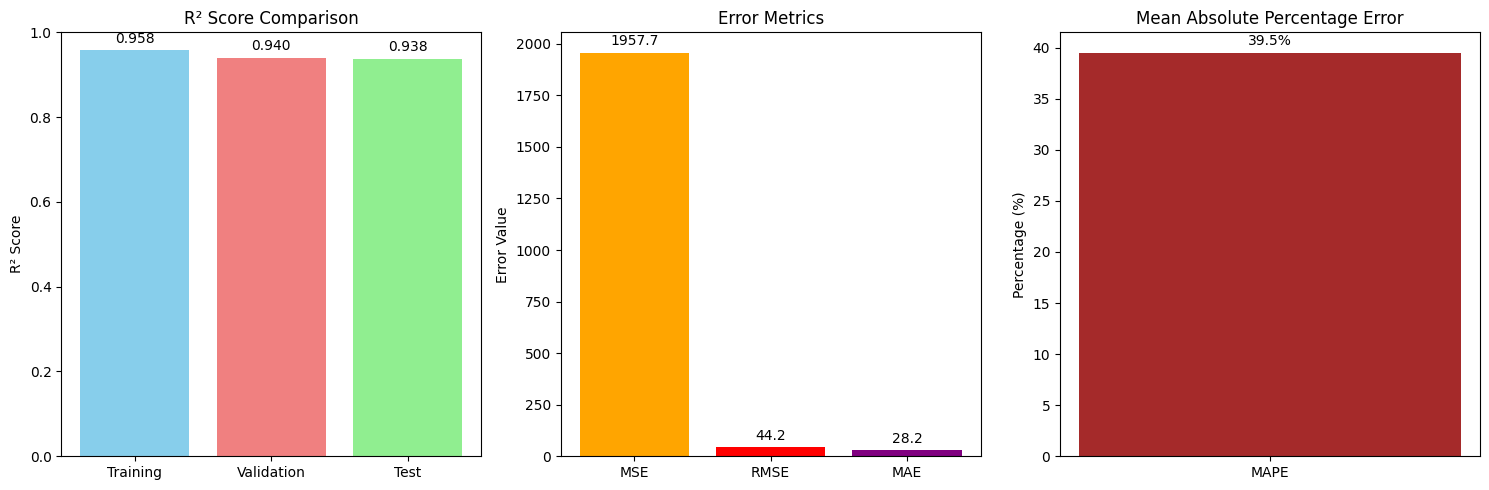

In [51]:
# Plot model performance comparison
plt.figure(figsize=(15, 5))

# Plot R² scores
plt.subplot(1, 3, 1)
categories = ['Training', 'Validation', 'Test']
scores = [train_score, val_score, r2]
bars = plt.bar(categories, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)

# Value label
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Plot error metrics
plt.subplot(1, 3, 2)
error_metrics = ['MSE', 'RMSE', 'MAE']
error_values = [mse, rmse, mae]
bars = plt.bar(error_metrics, error_values, color=['orange', 'red', 'purple'])
plt.title('Error Metrics')
plt.ylabel('Error Value')

# Value labels
for bar, value in zip(bars, error_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(error_values)*0.01, 
             f'{value:.1f}', ha='center', va='bottom')

# Plot MAPE
plt.subplot(1, 3, 3)
plt.bar(['MAPE'], [mape], color='brown')
plt.title('Mean Absolute Percentage Error')
plt.ylabel('Percentage (%)')

# Value label
plt.text(0, mape + mape*0.01, f'{mape:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


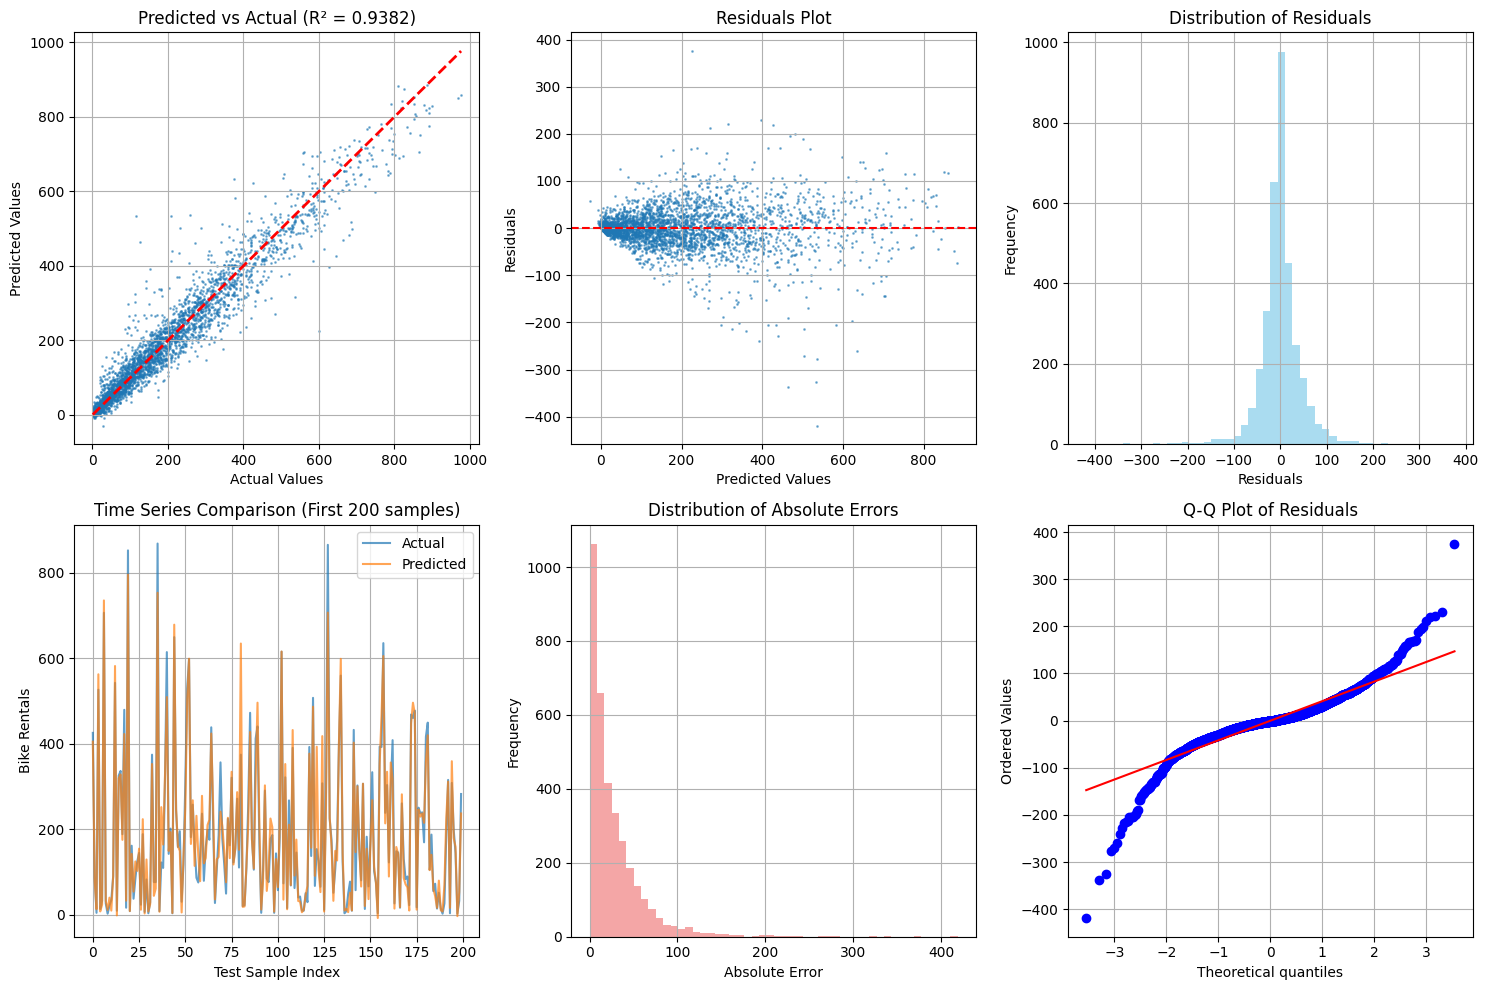

In [52]:
# Plot prediction vs actual
plt.figure(figsize=(15, 10))

# Scatter plot: Predicted vs Actual
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual (R² = {r2:.4f})')
plt.grid(True)

# Residuals plot
plt.subplot(2, 3, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5, s=1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)

# Histogram of residuals
plt.subplot(2, 3, 3)
plt.hist(residuals, bins=50, alpha=0.7, color='skyblue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)

# Time series comparison (first 200 test samples)
plt.subplot(2, 3, 4)
test_indices = range(min(200, len(y_test)))
plt.plot(test_indices, y_test.iloc[test_indices], label='Actual', alpha=0.7)
plt.plot(test_indices, y_pred[test_indices], label='Predicted', alpha=0.7)
plt.xlabel('Test Sample Index')
plt.ylabel('Bike Rentals')
plt.title('Time Series Comparison (First 200 samples)')
plt.legend()
plt.grid(True)

# Error distribution
plt.subplot(2, 3, 5)
absolute_errors = np.abs(residuals)
plt.hist(absolute_errors, bins=50, alpha=0.7, color='lightcoral')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Errors')
plt.grid(True)

# Q-Q plot for residuals normality
plt.subplot(2, 3, 6)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()
